In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
iris_data

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = iris_data.loc[:, features].values
y = iris_data.loc[:,['target']].values

In [5]:
pca = PCA(n_components=3)
data = pca.fit_transform(x)
iris_df = pd.DataFrame(data = data, columns = ['X-axis', 'Y-axis', 'Z-axis'])

In [6]:
plotting_data = pd.concat([iris_df, iris_data[['target']]], axis = 1)

In [7]:
plotting_data

,X-axis,Y-axis,Z-axis,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,0.187415,0.179303,Iris-virginica
146,1.525664,-0.375021,-0.120636,Iris-virginica
147,1.764046,0.078519,0.130784,Iris-virginica
148,1.901629,0.115877,0.722874,Iris-virginica


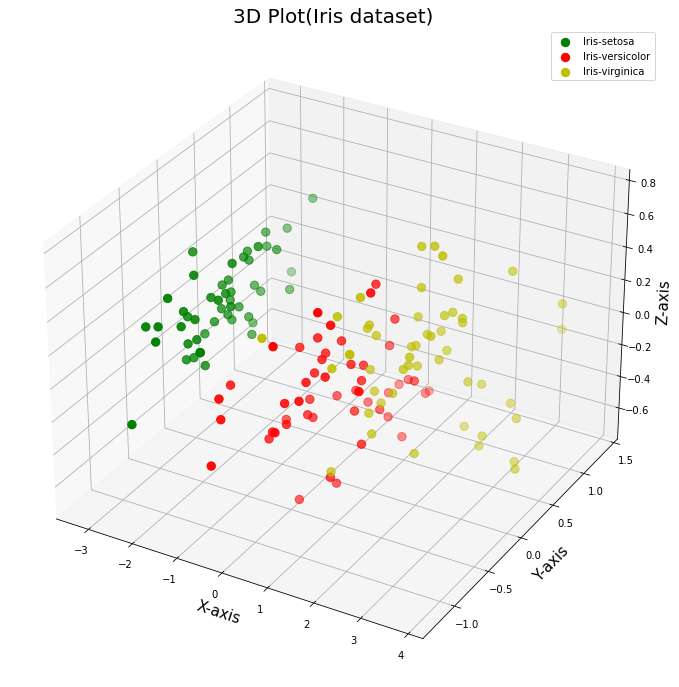

In [8]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111,projection = '3d')
ax.set_xlabel('X-axis', fontsize = 15)
ax.set_ylabel('Y-axis', fontsize = 15)
ax.set_zlabel('Z-axis', fontsize = 15)
ax.set_title('3D Plot(Iris dataset)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['g', 'r', 'y']
for target, color in zip(targets,colors):
    points = plotting_data['target'] == target
    ax.scatter(plotting_data.loc[points, 'X-axis']
               , plotting_data.loc[points, 'Y-axis']
               , plotting_data.loc[points, 'Z-axis']
               , c = color
               , s = 70)
ax.legend(targets)
ax.grid()
plt.show()